In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict

### Carga de Dataset previamente trabajado

Variables:
    - Categóricas ordinales: ArrTime_Range, DepTime_Range, Delay_level
    - Categóricas nominales: Origin, Dest, FullCarrier
    - Continuas: Cancelled, ArrDelay, CRSElapsedTime, DepDelay, AirTime, Distance, AvgSpeed, 10%_Delayed, Arr_Delay_vs_CRSElapsedTime --> Ya estandarizadas
        
Resto de variables son descartadas por no relevancia




In [ ]:
train_no_dummies_data = pd.read_csv('Delayed_Flights_no_dummies_train.csv')

In [5]:
train_no_dummies_data.shape

(1542690, 20)

### Reducción de muestra inicial para facilitar procesamiento

In [6]:
train_no_dummies, test_no_dummies = train_test_split(train_no_dummies_data, test_size = 0.8, random_state=42)

In [7]:
train_no_dummies.shape

(308538, 20)

### Pre-processed dataset without Origin or Dest

In [12]:
train_no_dummies.head()

,Unnamed: 0,index,DayOfWeek,FullCarrier,Origin,Dest,Cancelled,ArrDelay,CRSElapsedTime,DepDelay,ArrTime,DepTime,AirTime,Distance,AvgSpeed,10%_Delayed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range
1004945,1004949,659732,1,Expressjet Airlines Inc.,SAN,OMA,0,-0.249791,0.657075,-0.433393,14:59,09:50,1.001526,0.954990,0.473195,1,-0.389660,10_to_20%_Delay,1400-1459,0900-0959
1048849,1048853,1182746,5,American Eagle Airlines Inc.,LGA,RDU,0,-0.337856,-0.410212,-0.114195,21:53,20:22,-0.674639,-0.582332,0.197685,1,-0.288114,20_to_40%_Delay,2100-2159,2000-2059
118219,118219,693804,3,Mesa Airlines Inc.,MLI,ORD,0,-0.707728,-1.014072,-0.433393,17:22,16:38,-1.170201,-1.091287,-0.976433,0,-0.584819,Not_delayed,1700-1759,1600-1659
1059049,1059053,1625110,5,United Air Lines Inc.,ORD,LGA,0,-0.637276,0.081302,-0.508498,20:31,17:21,0.039553,-0.055947,-0.007914,0,-0.567365,Not_delayed,2000-2059,1700-1759
1315999,1316005,1820566,3,AirTran Airways Corporation,ICT,ATL,0,-0.408308,-0.213607,-0.414617,16:11,13:14,-0.135351,0.027716,0.751363,1,-0.381727,10_to_20%_Delay,1600-1659,1300-1359


In [13]:
train_no_dummies.drop(['Origin', 'Dest', 'ArrTime', 'DepTime'], inplace=True, axis=1)

C:\Users\tomi_\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
train_no_dummies.head()

,Unnamed: 0,index,DayOfWeek,FullCarrier,Cancelled,ArrDelay,CRSElapsedTime,DepDelay,AirTime,Distance,AvgSpeed,10%_Delayed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range
1004945,1004949,659732,1,Expressjet Airlines Inc.,0,-0.249791,0.657075,-0.433393,1.001526,0.954990,0.473195,1,-0.389660,10_to_20%_Delay,1400-1459,0900-0959
1048849,1048853,1182746,5,American Eagle Airlines Inc.,0,-0.337856,-0.410212,-0.114195,-0.674639,-0.582332,0.197685,1,-0.288114,20_to_40%_Delay,2100-2159,2000-2059
118219,118219,693804,3,Mesa Airlines Inc.,0,-0.707728,-1.014072,-0.433393,-1.170201,-1.091287,-0.976433,0,-0.584819,Not_delayed,1700-1759,1600-1659
1059049,1059053,1625110,5,United Air Lines Inc.,0,-0.637276,0.081302,-0.508498,0.039553,-0.055947,-0.007914,0,-0.567365,Not_delayed,2000-2059,1700-1759
1315999,1316005,1820566,3,AirTran Airways Corporation,0,-0.408308,-0.213607,-0.414617,-0.135351,0.027716,0.751363,1,-0.381727,10_to_20%_Delay,1600-1659,1300-1359


### Codificación de variables Ordinales

In [16]:
columns_to_encode = ['Delay_level', 'ArrTime_Range', 'DepTime_Range']

In [17]:
from sklearn import preprocessing

In [18]:
le = preprocessing.LabelEncoder()

In [19]:
train_no_dummies[columns_to_encode] = train_no_dummies[columns_to_encode].apply(le.fit_transform)

C:\Users\tomi_\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [20]:
train_no_dummies.head()

,Unnamed: 0,index,DayOfWeek,FullCarrier,Cancelled,ArrDelay,CRSElapsedTime,DepDelay,AirTime,Distance,AvgSpeed,10%_Delayed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range
1004945,1004949,659732,1,Expressjet Airlines Inc.,0,-0.249791,0.657075,-0.433393,1.001526,0.954990,0.473195,1,-0.389660,0,9,4
1048849,1048853,1182746,5,American Eagle Airlines Inc.,0,-0.337856,-0.410212,-0.114195,-0.674639,-0.582332,0.197685,1,-0.288114,1,16,15
118219,118219,693804,3,Mesa Airlines Inc.,0,-0.707728,-1.014072,-0.433393,-1.170201,-1.091287,-0.976433,0,-0.584819,3,12,11
1059049,1059053,1625110,5,United Air Lines Inc.,0,-0.637276,0.081302,-0.508498,0.039553,-0.055947,-0.007914,0,-0.567365,3,15,12
1315999,1316005,1820566,3,AirTran Airways Corporation,0,-0.408308,-0.213607,-0.414617,-0.135351,0.027716,0.751363,1,-0.381727,0,11,8


### Codificación de variables nominales en Dummy

In [21]:
train_dummies = train_no_dummies.copy()

In [22]:
train_dummies = pd.get_dummies(data=train_dummies, columns=['FullCarrier'])

In [23]:
train_dummies.columns

Index(['Unnamed: 0', 'index', 'DayOfWeek', 'Cancelled', 'ArrDelay',
       'CRSElapsedTime', 'DepDelay', 'AirTime', 'Distance', 'AvgSpeed',
       '10%_Delayed', 'ArrDelay_vs_CRSElapsedTime', 'Delay_level',
       'ArrTime_Range', 'DepTime_Range',
       'FullCarrier_AirTran Airways Corporation',
       'FullCarrier_Alaska Airlines Inc.', 'FullCarrier_Aloha Airlines Inc.',
       'FullCarrier_American Airlines Inc.',
       'FullCarrier_American Eagle Airlines Inc.',
       'FullCarrier_Atlantic Southeast Airlines', 'FullCarrier_Comair Inc.',
       'FullCarrier_Continental Air Lines Inc.',
       'FullCarrier_Delta Air Lines Inc.',
       'FullCarrier_Expressjet Airlines Inc.',
       'FullCarrier_Frontier Airlines Inc.',
       'FullCarrier_Hawaiian Airlines Inc.', 'FullCarrier_JetBlue Airways',
       'FullCarrier_Mesa Airlines Inc.', 'FullCarrier_Northwest Airlines Inc.',
       'FullCarrier_Pinnacle Airlines Inc.',
       'FullCarrier_Skywest Airlines Inc.',
       'FullCarrier_So

In [24]:
train_dummies.drop(['Unnamed: 0', 'index'], inplace=True, axis=1)

### Dataset final para trabajar realizar la clusterización

In [25]:
train_dummies.head()

,DayOfWeek,Cancelled,ArrDelay,CRSElapsedTime,DepDelay,AirTime,Distance,AvgSpeed,10%_Delayed,ArrDelay_vs_CRSElapsedTime,...,FullCarrier_Frontier Airlines Inc.,FullCarrier_Hawaiian Airlines Inc.,FullCarrier_JetBlue Airways,FullCarrier_Mesa Airlines Inc.,FullCarrier_Northwest Airlines Inc.,FullCarrier_Pinnacle Airlines Inc.,FullCarrier_Skywest Airlines Inc.,FullCarrier_Southwest Airlines Co.,FullCarrier_US Airways Inc.,FullCarrier_United Air Lines Inc.
1004945,1,0,-0.249791,0.657075,-0.433393,1.001526,0.954990,0.473195,1,-0.389660,...,0,0,0,0,0,0,0,0,0,0
1048849,5,0,-0.337856,-0.410212,-0.114195,-0.674639,-0.582332,0.197685,1,-0.288114,...,0,0,0,0,0,0,0,0,0,0
118219,3,0,-0.707728,-1.014072,-0.433393,-1.170201,-1.091287,-0.976433,0,-0.584819,...,0,0,0,1,0,0,0,0,0,0
1059049,5,0,-0.637276,0.081302,-0.508498,0.039553,-0.055947,-0.007914,0,-0.567365,...,0,0,0,0,0,0,0,0,0,1
1315999,3,0,-0.408308,-0.213607,-0.414617,-0.135351,0.027716,0.751363,1,-0.381727,...,0,0,0,0,0,0,0,0,0,0


### Reducción de variables a dos dimensiones mediante implementación de Principal Component Analysis

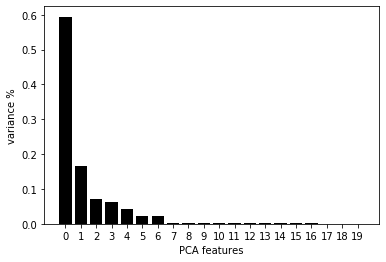

In [26]:
from sklearn.decomposition import PCA

# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(train_dummies)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [27]:
pca.explained_variance_ratio_

array([0.59419246, 0.16642153, 0.07036474, 0.06164946, 0.04347707,
       0.02221118, 0.02146257, 0.00291083, 0.002572  , 0.0016129 ,
       0.00125598, 0.0012073 , 0.00109232, 0.0010032 , 0.00091536,
       0.00089466, 0.00087075, 0.00075818, 0.00071961, 0.00066609])

Text(0, 0.5, 'variance %')

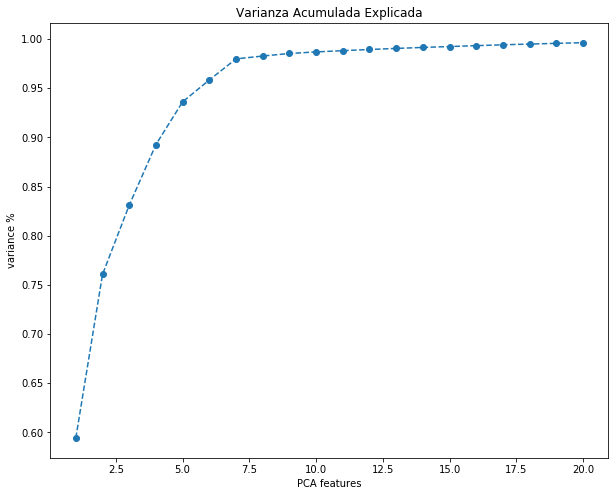

In [28]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title('Varianza Acumulada Explicada')
plt.xlabel('PCA features')
plt.ylabel('variance %')
#plt.xticks(features)
# Save components to a DataFrame


##### El principal componente explica alrededor del 60% de la varianza. Conjunto con el segundo componente, alcanzan más del 75%. Se van a tomar estos dos componentes para continuar con la clusterización del dataset.



In [29]:
print(pca.explained_variance_)

[33.72867247  9.4467325   3.99417608  3.49946293  2.46792755  1.26079279
  1.21829904  0.16522983  0.1459967   0.09155453  0.07129414  0.06853122
  0.06200432  0.05694575  0.0519592   0.05078428  0.049427    0.04303742
  0.04084797  0.03781007]


### Visualización de los dos principales componentes

Text(0, 0.5, 'PCA 2')

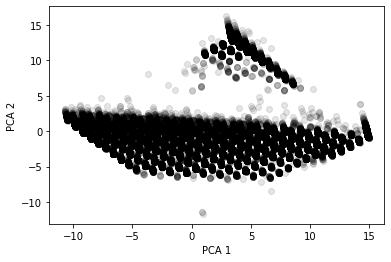

In [30]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

##### Gráficamente parecieran haber dos grupos de observaciones diferentes, asimilables a dos Clusters.

### Curva del "Codo"

##### Implementación de KMeans con Train sujeto a PCA y a los principales 2 primeros componentes, con K desde 1 a 10.

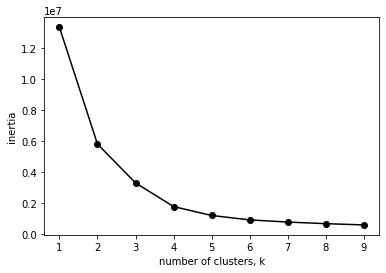

In [34]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

##### K = 4 pareciera ser el "codo" o "elbow" point. A partir de este punto, en principio no habrían cambios significativos en la expliación marginal de la varianza tras incorporar un Cluster adicional. Por este motivo la cantidad de Clusters óptima es de 4

## Clasificación de observaciones respecto a los 4 clusters posibles

In [35]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [36]:
kmeans_pca.fit(PCA_components.iloc[:,:2])

KMeans(n_clusters=4, random_state=42)

In [38]:
df_segm_pca_kmeans = pd.concat([PCA_components.iloc[:,:2].reset_index(drop = True), pd.DataFrame(PCA_components.iloc[:,:2])], axis = 1)
df_segm_pca_kmeans.columns = ['Componente 1', 'Componente 2', 'Componente1b', 'Componente2b']
df_segm_pca_kmeans.drop(columns=['Componente1b', 'Componente2b'], inplace=True, axis=1)

#Quizas tenga que eliminar Componente1b y 2b y quitar el drop


df_segm_pca_kmeans['Segmento K-Means PCA'] = kmeans_pca.labels_

In [39]:
df_segm_pca_kmeans

,Componente 1,Componente 2,Segmento K-Means PCA
0,5.407041,-3.380782,0
1,-7.053033,0.703560,3
2,-1.389915,0.134754,1
3,-4.330911,-1.093666,3
4,1.284498,-1.526688,1
...,...,...,...
308533,1.378549,0.024834,1
308534,-6.549628,0.966830,3
308535,-1.435688,0.286878,1
308536,-6.406337,0.026391,3


### Visualización gráfica de Clusters mediante utilización de principales variables

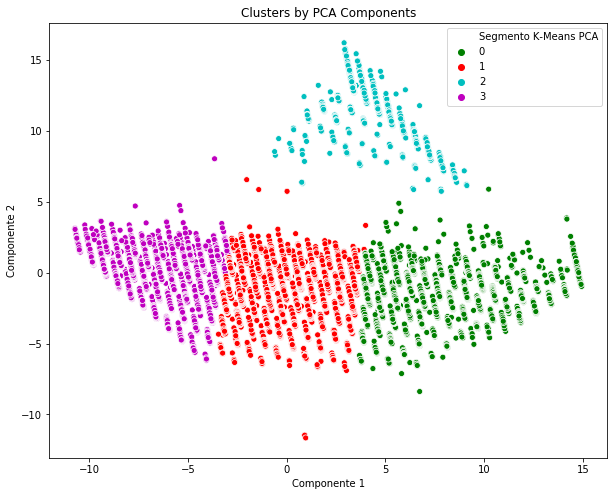

In [40]:
x_axis = df_segm_pca_kmeans['Componente 1']
y_axis = df_segm_pca_kmeans['Componente 2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segmento K-Means PCA'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

# EJERCICIO 2: Clusterización jerárquica

In [41]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [42]:
hierarchical_data = PCA_components.iloc[:,:2]

### Reduciendo muestra por incapacidad de procesamiento. 

In [45]:
small_cluster_a, small_cluster_b = train_test_split(hierarchical_data, test_size = 0.9, random_state=42)

In [46]:
len(small_cluster_a)

30853

In [ ]:
# single linkage
sl_mergings = linkage(small_cluster_a, method="single", metric='euclidean')
dendrogram(sl_mergings)
plt.show()

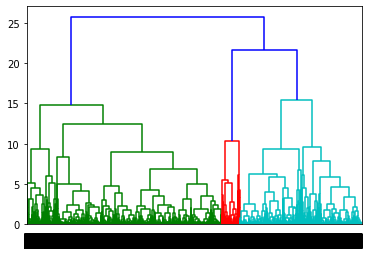

In [47]:
# complete linkage
cl_mergings = linkage(small_cluster_a, method="complete", metric='euclidean')
dendrogram(cl_mergings)
plt.show()

In [ ]:
# 4 clusters using single linkge
sl_cluster_labels = cut_tree(sl_mergings, n_clusters=4).reshape(-1, )
sl_cluster_labels

In [53]:
# the single linkage clustering does not perform well in generating the clusters hence we go for complete linkage
# 4 clusters using complete linkage
cl_cluster_labels = pd.Series(cut_tree(cl_mergings, n_clusters=4).reshape(-1, ))
cl_cluster_labels

0        0
1        1
2        2
3        2
4        2
        ..
30848    2
30849    0
30850    1
30851    3
30852    3
Length: 30853, dtype: int32

In [55]:
small_cluster_a

,0,1
185320,3.472216,-1.085048
135032,7.079776,-0.680604
96441,-9.356438,1.048653
294611,-3.576084,-0.326010
55237,-0.190522,-1.039639
...,...,...
119879,1.353287,0.181432
259178,2.803866,-0.179249
131932,7.060712,-0.638588
146867,5.729701,11.231815


In [59]:
pca_hierarchical = pd.concat([small_cluster_a.reset_index(drop = True), cl_cluster_labels], axis=1)
pca_hierarchical.columns = ["PC1","PC2","Segmento Hierarchical Cluster"]
pca_hierarchical.head()

,PC1,PC2,Segmento Hierarchical Cluster
0,3.472216,-1.085048,0
1,7.079776,-0.680604,1
2,-9.356438,1.048653,2
3,-3.576084,-0.326010,2
4,-0.190522,-1.039639,2


### Visualización gráfica de Clusters mediante componentes principales

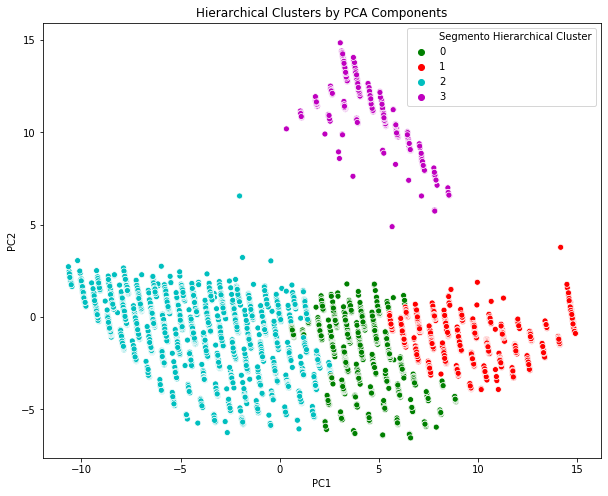

In [61]:
x_axis = pca_hierarchical['PC1']
y_axis = pca_hierarchical['PC2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = pca_hierarchical['Segmento Hierarchical Cluster'], palette = ['g', 'r', 'c', 'm'])
plt.title('Hierarchical Clusters by PCA Components')
plt.show()

# EJERCICIO 3: Silhouette

### PCA Cluster Kmeans:

##### Se implementa el Silhouette tan solo con n_clusters = 4 ya que la extensión del dataset hace imposible replicar su implementación iterativamente con N veces.

The average silhouette_score is :0.5290743111493609


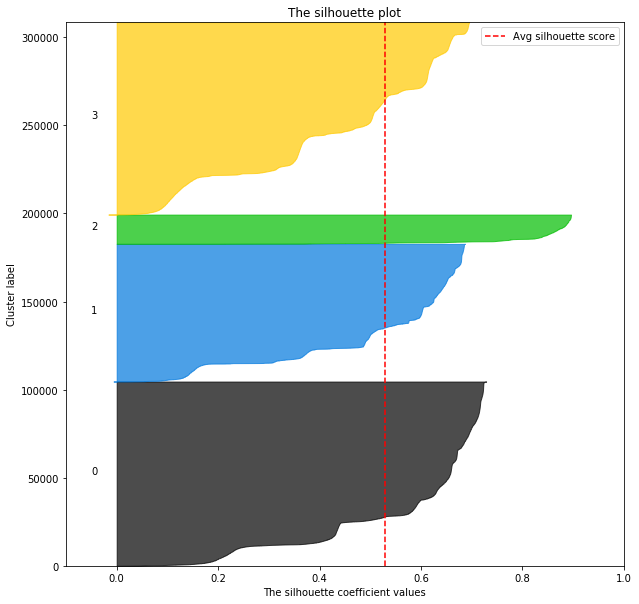

In [63]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
n_clusters = 4
plt.figure(figsize = (10,10))
plt.gca().set_xlim([-0.1,1])
plt.gca().set_ylim([0, len(PCA_components.iloc[:,:2]) + (n_clusters + 1) * 10])
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
labels = clusterer.fit_predict(PCA_components.iloc[:,:2])
print("The average silhouette_score is :{}".format(silhouette_score(PCA_components.iloc[:,:2], labels)))
sample_silhouette_values = silhouette_samples(PCA_components.iloc[:,:2], labels)
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = \
    sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.gca().fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    plt.gca().text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.gca().axvline(x=silhouette_score(PCA_components.iloc[:,:2], labels), color="red", linestyle="--", label = "Avg silhouette score")
plt.title("The silhouette plot")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
plt.legend()
plt.show()

### Silhouette iterativo en PCA Hierarchical Cluster (dataset es más pequeño por lo cual es factible implementarlo iterativamente)

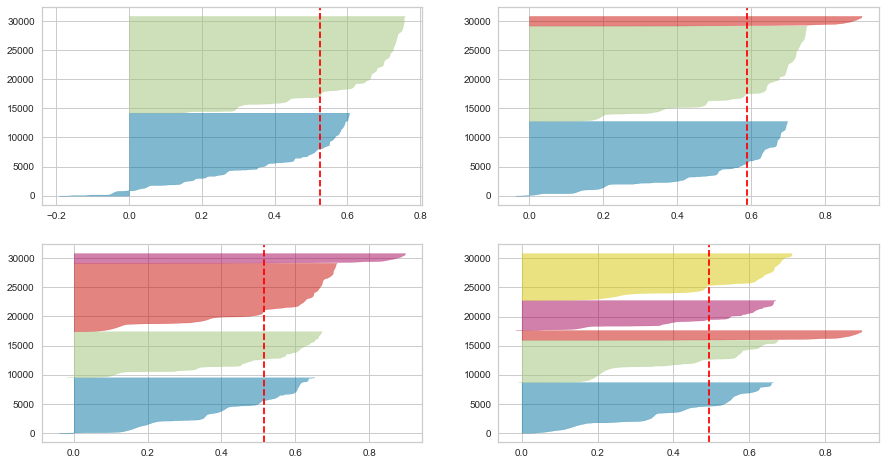

In [65]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(pca_hierarchical)

##### Compaprando los gráficos de Silhouette, no es clara la decisión de qué cantidad de clusters tomar. Las tres variables a considerar son:
##### - Ancho de los clusters (indican volumen de observaciones)
##### - Clusters con score por debajo de la media
##### - Valores cercanos a 1 o -1

##### Ningún score está por debajo de la media y tampoco hay clusters con scores cercanos a -1 o 1. Siguiendo el indicador del ancho de los Cluster, entonces la cantidad "preferible" sería de 4 o 5. 
